Available temp.: [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26.]
Sed. time in Seconds: 0.08729455704160458
Sed. time in Seconds: 0.3491782281664183
Sed. time in Seconds: 0.7126086289110576
Sed. time in Seconds: 1.3967129126656732
Sed. time in Seconds: 8.729455704160458
Sed. time in Seconds: 34.91782281664183
Sed. time in Seconds: 139.67129126656732
Sed. time in Seconds: 872.9455704160457
Sed. time in Seconds: 3491.782281664183
Sed. time in Seconds: 0.08932715859782016
Sed. time in Seconds: 0.35730863439128063
Sed. time in Seconds: 0.7292012946760825
Sed. time in Seconds: 1.4292345375651225
Sed. time in Seconds: 8.932715859782014
Sed. time in Seconds: 35.73086343912806
Sed. time in Seconds: 142.92345375651223
Sed. time in Seconds: 893.2715859782012
Sed. time in Seconds: 3573.0863439128048
Sed. time in Seconds: 0.09136787448946068
Sed. time in Seconds: 0.36547149795784273
Sed. time in Seconds: 0.7458601999139644
Sed. time in Seconds: 1.461885991831371
Sed. time in Seconds: 9.13678744894606

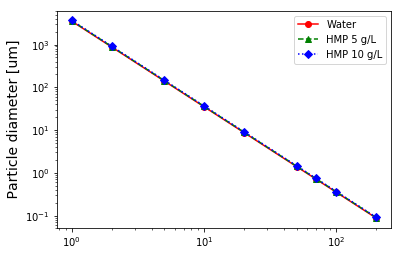

In [2]:
#PSP sedimentation
from __future__ import print_function, division
from vpython import canvas,vector,color,cylinder,sphere,rate
from numpy import zeros
import matplotlib.pyplot as plt
from PSP_readDataFile import readDataFile

parDensity=2580.0
g=9.80665

def getSedTime(solDensity,solVisco,parDiameter,z):
    numer=18.0*solVisco*z
    denom=(g*(parDensity-solDensity)*(parDiameter*0.00001)**2)
    return numer/denom

def getSedDepth(solDensity,solVisco,parDiameter,time):
#---use same relation in above function---------
    numer=(time*g*(parDensity-solDensity)*(parDiameter*0.00001)**2)
    denom=18.0*solVisco
    return numer/denom

def getSolDensity(liqDensity,conc):
#---Input in g/L------------------
    return liqDensity*(1.0+0.63*(conc/1000.0))

def getSolVisco(liqVisco,conc):
    return liqVisco*(1.0+4.25*(conc/1000.0))

def initScene(Cylheight,parRadius):
    scene=canvas(width=600,height=600,exit=True)
    scene.center=vector(0,0,0)
    scene.forward=vector(0,1,-0.5)
#---Setting a cylinder-------------------
    SedCyl=cylinder(pos=vector(0,0,0),radius=0.05)
    SedCyl.axis=vector(0,0,-Cylheight)
    SedCyl.color=color.white
    SedCyl.opacity=0.2
    particle=sphere(pos=vector(0,0,0), color=color.blue)
    particle.radius=min(parRadius*0.001,0.02)
    return particle

def main():
    A, isFileOk=readDataFile("waterDensity.dat",2, '\t', False)
    if ((not isFileOk) or (len(A[0]) < 3)):
        print("Wrong fole!\nMissing data or wroung delimiter in line:",A+1)
        return
    
    temp=A[:,0]
    density=A[:,1]
    visco=A[:,2]
    print("Available temp.:", temp)
    
    isGoodChoice=False
    t=20.0
    while not isGoodChoice:
 #       t=float(input("\nInput temp.: "))
        for i in range(len(temp)):
            if temp[i]==t:
                isGoodChoice=True
                liqDensity=density[i]
                liqVisco=visco[i]
        if not isGoodChoice:
            print("Warning: not available value")

    Cylheight=0.3
            
    conc=[0.0,5.0,10.0]# 0 for water
    diameter=[200.0,100.0,70.0,50.0,20.0,10.0,5.0,2.0,1.0]
    
    Nconc=len(conc)
    Ndim=len(diameter)
    
    sedtime=zeros([Ndim,Nconc],float)
    
    for ii in range(Nconc):
        for jj in range(Ndim):
            solDensity=getSolDensity(liqDensity,conc[ii])
            solVisco=getSolVisco(liqVisco,conc[ii])
            
    
#    particle=initScene(Cylheight,diameter/2.0)
    
            sedtime[jj,ii]=getSedTime(solDensity,solVisco,diameter[jj],Cylheight)
#    depth=0
#    while depth < Cylheight:
#        rate(1)
#        depth=getSedDepth(solDensity,solVisco,diameter,time)
#        particle.pos=vector(0,0,-depth)
#        time+=1
            print("Sed. time in Seconds:", sedtime[jj,ii])
    
    plt.plot(diameter[:],sedtime[:,0],"ro-",label="Water")
    plt.plot(diameter[:],sedtime[:,1],"g^--",label="HMP 5 g/L")
    plt.plot(diameter[:],sedtime[:,2],"bD:",label="HMP 10 g/L")
    
    plt.ylabel(" Sedimentation time [s] ",fontsize=14)
    plt.ylabel(" Particle diameter [um] ",fontsize=14)
    plt.legend(loc="best")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()    
        
main()